In [27]:
import os

In [28]:
import pandas as pd

## Changing Column Names and Merging Tables

In [29]:
lif_exp = pd.read_csv("ddf--datapoints--life_expectancy_at_birth_data_from_ihme--by--geo--time.csv")
lif_exp

,geo,time,life_expectancy_at_birth_data_from_ihme
0,afg,1990,50.3
1,afg,1991,50.2
2,afg,1992,50.4
3,afg,1993,50.5
4,afg,1994,50.1
...,...,...,...
4507,zwe,2009,49.6
4508,zwe,2010,50.4
4509,zwe,2011,51.9
4510,zwe,2012,54.1


In [30]:
lif_exp = lif_exp.rename(columns={'geo':'Country','time':'Year','life_expectancy_at_birth_data_from_ihme':'Life Expectancy'})

In [31]:
lif_exp

,Country,Year,Life Expectancy
0,afg,1990,50.3
1,afg,1991,50.2
2,afg,1992,50.4
3,afg,1993,50.5
4,afg,1994,50.1
...,...,...,...
4507,zwe,2009,49.6
4508,zwe,2010,50.4
4509,zwe,2011,51.9
4510,zwe,2012,54.1


In [32]:
gdp = pd.read_csv("ddf--datapoints--alternative_gdp_per_capita_ppp_wb--by--geo--time.csv")
gdp

,geo,time,alternative_gdp_per_capita_ppp_wb
0,abw,1990,32278.86854
1,abw,1991,33744.10880
2,abw,1992,34544.06065
3,abw,1993,35957.81597
4,abw,1994,37683.91771
...,...,...,...
6095,zwe,2018,2399.62155
6096,zwe,2019,2203.39681
6097,zwe,2020,1990.31942
6098,zwe,2021,2115.14456


In [33]:
gdp = gdp.rename(columns={'geo':'Country','time':'Year','alternative_gdp_per_capita_ppp_wb':'GDP per Capita'})
gdp

,Country,Year,GDP per Capita
0,abw,1990,32278.86854
1,abw,1991,33744.10880
2,abw,1992,34544.06065
3,abw,1993,35957.81597
4,abw,1994,37683.91771
...,...,...,...
6095,zwe,2018,2399.62155
6096,zwe,2019,2203.39681
6097,zwe,2020,1990.31942
6098,zwe,2021,2115.14456


In [34]:
pop = pd.read_csv("ddf--datapoints--total_population_with_projections--by--geo--time.csv")
pop

,geo,time,total_population_with_projections
0,abw,1800,19290
1,abw,1820,19290
2,abw,1950,38070
3,abw,1951,38260
4,abw,1952,38970
...,...,...,...
22059,zwe,2011,12750000
22060,zwe,2012,13010000
22061,zwe,2013,13330000
22062,zwe,2050,20610000


In [35]:
pop = pop.rename(columns={'geo':'Country','time':'Year','total_population_with_projections':'Population'})
pop

,Country,Year,Population
0,abw,1800,19290
1,abw,1820,19290
2,abw,1950,38070
3,abw,1951,38260
4,abw,1952,38970
...,...,...,...
22059,zwe,2011,12750000
22060,zwe,2012,13010000
22061,zwe,2013,13330000
22062,zwe,2050,20610000


In [53]:
df = pd.merge(lif_exp, pd.merge(gdp, pop, on=["Country", "Year"], how="inner"), on=["Country", "Year"], how="inner")
df

,Country,Year,Life Expectancy,GDP per Capita,Population
0,afg,2002,51.6,1280.46317,24640000
1,afg,2003,52.1,1292.33344,25680000
2,afg,2004,52.5,1260.06058,26690000
3,afg,2005,52.9,1352.32063,27610000
4,afg,2006,53.2,1366.99315,28420000
...,...,...,...,...,...
4110,zwe,2009,49.6,1500.37978,12470000
4111,zwe,2010,50.4,1799.54023,12570000
4112,zwe,2011,51.9,2033.18137,12750000
4113,zwe,2012,54.1,2310.80722,13010000


## Counting Unique Countries and Filtering

In [37]:
unique_countries_count = df['Country'].nunique()
print("Number of unique countries:", unique_countries_count)

Number of unique countries: 179


In [38]:
target_year = 2010
df_specific_year = df[df['Year'] == target_year]
print(df_specific_year)

     Country  Year  Life Expectancy  GDP per Capita  Population
8        afg  2010             54.8      2026.16382    31410000
32       ago  2010             59.4      7689.82074    19080000
56       alb  2010             75.2     10749.51884     3204000
80       are  2010             76.2     56626.73751     7512000
104      arg  2010             75.8     23521.27018    40410000
...      ...   ...              ...             ...         ...
4015     vut  2010             64.0      2972.36874      239700
4039     wsm  2010             71.6      5808.40459      183100
4063     zaf  2010             56.7     13469.36113    50130000
4087     zmb  2010             54.1      3083.35532    13090000
4111     zwe  2010             50.4      1799.54023    12570000

[177 rows x 5 columns]


In [54]:
df_sorted = df.sort_values(by='Life Expectancy', ascending=False)
df_sorted

,Country,Year,Life Expectancy,GDP per Capita,Population
1955,jpn,2013,83.3,39569.63657,126300000
1954,jpn,2012,83.2,38735.89635,126400000
1952,jpn,2010,83.0,38069.95604,126500000
1839,isl,2012,82.8,48440.25508,328300
1953,jpn,2011,82.8,38149.61811,126500000
...,...,...,...,...,...
3216,rwa,1995,42.0,766.33174,5570000
1675,hti,2010,37.0,2943.54950,9993000
3218,rwa,1997,36.3,729.64894,6298000
232,bdi,1994,27.0,1103.16730,6017000


In [61]:
chosen_year = int(input("Choose a year to view:"))
df_chosen_year = df[df['Year'] == chosen_year]
print(df_chosen_year.sort_values(by='Life Expectancy', ascending=False))

Choose a year to view: 2012


     Country  Year  Life Expectancy  GDP per Capita  Population
1954     jpn  2012             83.2     38735.89635   126400000
1839     isl  2012             82.8     48440.25508      328300
702      che  2012             82.6     65783.58911     7734000
1882     ita  2012             82.1     41501.71123    60960000
1858     isr  2012             82.1     35849.88361     7695000
...      ...   ...              ...             ...         ...
4113     zwe  2012             54.1      2310.80722    13010000
1490     gnb  2012             52.5      1710.02377     1580000
654      caf  2012             52.3      1208.51577     4576000
3547     swz  2012             50.3      7701.39398     1220000
2266     lso  2012             48.2      2534.85949     2217000

[177 rows x 5 columns]


In [39]:
df_population_less_than_1m = df[df['Population'] < 1000000]
df_population_less_than_1m

,Country,Year,Life Expectancy,GDP per Capita,Population
132,atg,1990,72.4,17016.86476,62200
133,atg,1991,72.3,17303.63926,62750
134,atg,1992,72.1,17226.61576,63800
135,atg,1993,72.1,17812.46743,65240
136,atg,1994,72.2,18651.02358,66900
...,...,...,...,...,...
4038,wsm,2009,69.9,5515.57284,182400
4039,wsm,2010,71.6,5808.40459,183100
4040,wsm,2011,71.6,5980.39512,183900
4041,wsm,2012,71.6,5705.67815,184800


## Choosing a specific continent

pip install pycountry_convert

import pycountry_convert as pc

def get_continent(country_code):
    try:
        continent_code = pc.country_alpha3_to_continent_code(country_code.upper())
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

df['Continent'] = df['Country'].apply(get_continent)
target_continent = 'Asia'
df_specific_continent = df[df['Continent'] == target_continent]
df_specific_continent

The codes above didn't work and I was

## Visualization

In [62]:
import matplotlib.pyplot as plt
def plot_life_expectancy(country_name):
    df_country = df[df['Country'] == country_name]
    plt.plot(df_country['Year'], df_country['Life Expectancy'], marker='o')
    plt.title('Life Expectancy Trend for ' + country_name)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.grid(True)
    plt.show()

Choose a country to visualize life expectancy trends:  lso


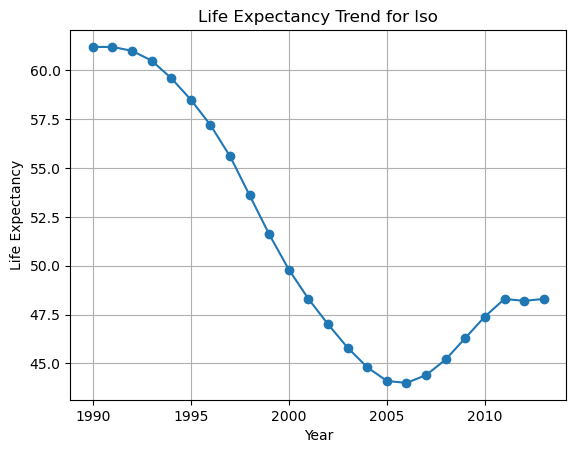

In [66]:
chosen_country = input("Choose a country to visualize life expectancy trends: ")
plot_life_expectancy(chosen_country)